# Notes on SiBCASA - GFED4 fire parameters:
- How does mortality affects the biomass? Is the mortality after fire event? Is there a recover after one year? What happen after each time step?
- Why there is no mortality on leaf, root and wood? 
- What is the difference between wood and storage pools? the storage pool represents the total amount of nonstructural carbohydrates (sugars and starch). Of this storage only the sugar portion, mainly in the form of sucrose, is readily available for plant growth. The model assumes 10%  of sugar fraction for all biomes. Ivar separated the sugar from the starch  defining two storage pools. It is needed when using isotopes, but not when modeling total carbon alone
- How does the fire conversion efficiency works and how does it affects emissions?
- Note that root, and all soil pools have a fire conversion efficiency of 1.0, this might be the reason why there are higher emissions in sibcasa on 2010!!!


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
import os 
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
import netCDF4 as cdf 
import numpy as np
import pylab as plb
from tm5tools import globarea
import calendar
from maptools import select_map

In [3]:
biomes_sib_koppen=['No biome specified',                                         #0
                  'Tall Broadleaf-Evergreen Trees, Climate = Trop. Rainforest',  #1
                  'Tall Broadleaf-Evergreen Trees, Climate = Trop. Monsoon',     #2
                  'Tall Broadleaf-Evergreen Trees, Climate = Trop. Savannah',    #3
                  'Tall Broadleaf-Evergreen Trees, Outside South America',       #4
                  'Tall Broadleaf-Deciduous Trees',                              #5
                  'Tall Broadleaf and Needleleaf Trees',                         #6
                  'Tall Needleleaf Trees',                                       #7
                  'Tall Needleleaf-Deciduous Trees',                             #8
                  'Short Vegetation (Savanna)',                                  #9
                  'Short Vegetation (Grasslands)',                               #10
                  'Short Vegetation (None)',                                     #11
                  'Short Broadleaf Shrubs - Bare Soil',                          #12
                  'Short Ground Cover (Tundra)',                                 #13
                  'No Vegetation (Low Latitude Desert)',                         #14
                  'Agriculture']                                                 #15

clrs_sib_koppen=['lightgray',     #0
                  'darkblue',      #1
                  'blue',          #2
                  'lightblue',     #3
                  'green',         #4
                  'magenta',       #5
                  'orange',        #6
                  'darkgreen',     #7
                  'yellow',        #8
                  'tan',           #9
                  'lawngreen',     #10
                  'purple',        #11
                  'orangered',     #12
                  'brown',         #13
                  'wheat',         #14
                  'darkslateblue'] #15

labels = ['SiBCASA-GFED4','GFAS','FINN','CASA-GFED4-hourly','CASA-GFED4-d']

biofireparamdirs = [
'/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr/',
'/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr_gfas_fires/',
'/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr_finn_fires/', #FINN
#'/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/casa-gfed4-3h-fires-monthly-bio/', #CASA-GFED4 fires 3h
'/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/casa-gfed4-daily-fires-monthly-bio/'#CASA-GFED4 fires daily
]
colors_bf = ['red','orange','green','purple','blue','grey']
clrs_sib_koppen=['darkblue','blue','lightblue','green','magenta','orange','darkgreen','yellow','tan','lawngreen','purple','orangered','brown','wheat','darkslateblue']

In [4]:
mf = cdf.Dataset('/Users/botia/daily_fires/amazon_mask.nc')
print mf.file_format 
print mf.dimensions.keys()
print mf.dimensions['longitude'] 
print mf.dimensions['latitude']

# the mask has a 1x1 degree resolution
mask = mf.variables['regionmask'][:]
fac = 86400.*365.*12./1.e15
glarea = globarea(im=360,jm=180)
print glarea.sum()

NETCDF4
[u'longitude', u'latitude']
<type 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 360

<type 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 180

5.1006447191e+14


<matplotlib.colorbar.Colorbar instance at 0x116938ab8>

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


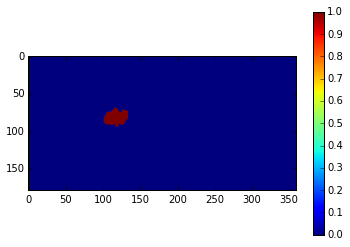

In [5]:
imshow(mask)
colorbar()

In [6]:
## Creating masks
f = cdf.Dataset('/Storage/CO2/carbontracker/input/ctdas_2012/regions_sibcasa_koppen_sam.nc') # assigning to f the dataset from the netcdf file
print f.dimensions.keys()
print f.dimensions['lat'] 
print f.dimensions['lon']
tc = f.variables['transcom_regions'][:]     #from f the variable transcom_regions is assigned to tc
biomes = f.variables['land_ecosystems'][:]  # This biomes, include the whole world and the ocean has nothing assigned (NaN).
f.close() 
print type(biomes), shape(biomes), type(tc)
                                            #biomes is a masked array


[u'lat', u'lon']
<type 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 180

<type 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 360

<class 'numpy.ma.core.MaskedArray'> (180, 360) <type 'numpy.ndarray'>


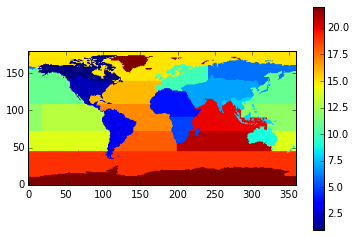

In [7]:
imshow(tc)
colorbar()
plt.gca().invert_yaxis()

numpy.ma.core.MaskedArray

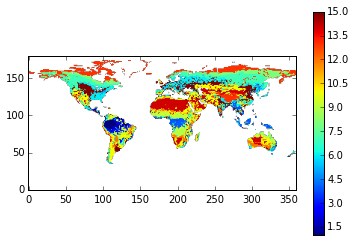

In [8]:
imshow(biomes)
colorbar()
plt.gca().invert_yaxis()
type(biomes)

[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]] [[0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 ..., 
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]] <class 'numpy.ma.core.MaskedArray'>


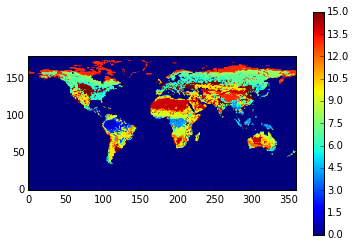

In [9]:
biomes[np.where(biomes.mask)] = 0 # Where biomes is masked (invalid), in the ocean, where the values are invalid for calculations
                                  # as it seen in the white map above, it is set to zero. In this way they become valid and 
                                  # usable. Note that the map begins from zero now
print biomes.mask, biomes, type(biomes)
imshow(biomes)
colorbar()
plt.gca().invert_yaxis()

<class 'numpy.ma.core.MaskedArray'> <class 'numpy.ma.core.MaskedArray'>


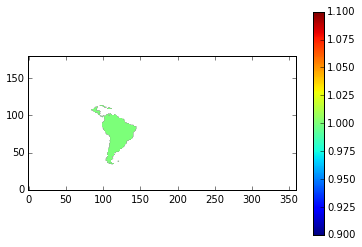

In [10]:
index = np.where(tc <> 3)           # defines an index for the places where the transcom regions are different than 3
tc[index] = 0                       # everywhere in tc where the index is present (not 3) is equal to zero
index = np.where(tc <> 0)           # a new index to redefine tc
tc[index] = 1                       # everywhere in tc where the index is present, 3, is equal to 1
tc = np.ma.masked_where(tc == 0,tc) # masks array where a condition is met, it changes the type of tc to masked array, it was a numpy array
                                    # the condition is that where tc is zero (oceans), it is masked
                                    # numpy.ma.masked_where(condition, a, copy=True)
imshow(tc)
colorbar()
plt.gca().invert_yaxis()
print type (tc),type(biomes)
#OUTPUT: constrained transcom region in southamerica

<class 'numpy.ma.core.MaskedArray'> (180, 360)


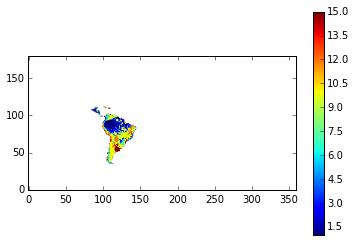

In [11]:
biomes = np.ma.masked_where(tc == 0,biomes) # same as above
biomes = np.ma.masked_where(biomes == 0,biomes)
# Biomes = 0 is the ocean, and tc = 0 is the land, except for SAM, so this places are masked.
imshow(biomes)
colorbar()
plt.gca().invert_yaxis()
print type(biomes), shape(biomes)
#OUTPUT: Biome map for southamerica 

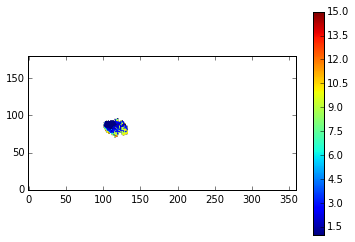

In [12]:
### Constrained biome map for Amazonia
biomes_amazon_sibcasa_1x1 = np.ma.masked_where(mask == 0,biomes) 
imshow(biomes_amazon_sibcasa_1x1)
colorbar()
plt.gca().invert_yaxis()

/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr/
2010 (180, 360) 2.12164191439 2.12164191439
2011 (180, 360) 3.64262595285 1.52098402958
2012 (180, 360) 5.57966981304 1.93704384952
2013 (180, 360) 7.25296318291 1.67329335478
2014 (180, 360) 9.05818023186 1.80521707615
2015 (180, 360) 11.1213022391 2.06312198728
/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr_gfas_fires/
2010 (180, 360) 1.72249630405 1.72249630405
2011 (180, 360) 3.54353635635 1.82104004854
2012 (180, 360) 5.50981883571 1.96628248373
2013 (180, 360) 7.00110744633 1.49128860629


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:29: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.


2014 (180, 360) 8.75124268464 1.7501352461
2015 (180, 360) 10.8413795531 2.09013688293
/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr_finn_fires/
2010 (180, 360) 1.99225700854 1.99225700854
2011 (180, 360) 3.63453547262 1.64227846342
2012 (180, 360) 5.5106465231 1.87611104977
2013 (180, 360) 7.20551354015 1.69486701933
2014 (180, 360) 8.22262900829 1.01711546669
2015 (180, 360) 9.54126713669 1.31863812877
/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/casa-gfed4-daily-fires-monthly-bio/
2010 (180, 360) 2.1537972662 2.1537972662
2011 (180, 360) 4.02871733944 1.87492007669
2012 (180, 360) 6.07366979679 2.04495245377
2013 (180, 360) 7.84965630035 1.7759865058
2014 (180, 360) 9.89738503301 2.04772872869
2015 (180, 360) 12.1907377494 2.293352738


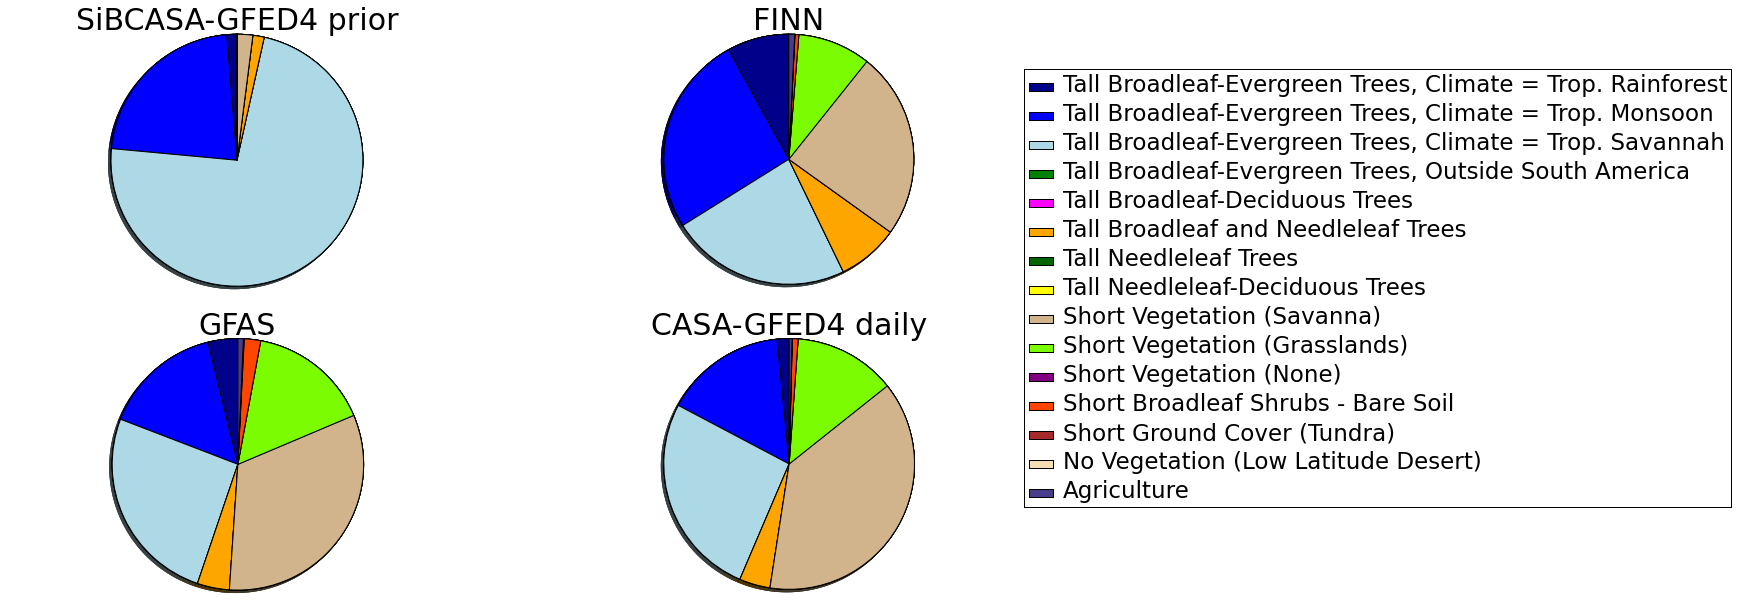

In [112]:
biomes_seperate_years = False
minyear = 2010
maxyear = 2016

fig = plt.figure(1,figsize=(28,10))
ax1 = plt.subplot(231)
ax1.set_title('SiBCASA-GFED4 prior',fontsize=30)
ax2 = plt.subplot(234)
ax2.set_title('GFAS',fontsize=30)
ax3 = plt.subplot(232)
ax3.set_title('FINN',fontsize=30)
ax4 = plt.subplot(235)
ax4.set_title('CASA-GFED4 daily',fontsize=30)

for ii,dirbf in enumerate(biofireparamdirs):
    print dirbf
    for y in range(minyear,maxyear): 
        for fname in os.listdir(dirbf):
            if fname.startswith('READ'): continue
            if not int(fname[-9:-5]) == y: continue  
            bf = cdf.Dataset(dirbf+fname)           # the next if is to check if the co2fire variable is in the files within 
                                                    # the directory
            if 'co2fire' in bf.variables.keys():    # bf is in 1x1 degree
                bb = np.float32(bf.variables['co2fire'][:])
            else: bb = bf.variables['bb'][:]
            if bb.shape[0] == 180:                  # adds time dimension
                bb.resize(1,180,360)
            try: 
                bb[bb.mask] = 0
                bb = np.array(bb)
            except: pass
            if int(fname[-5:-3]) == 1:              # if its equal to the first month then bb_sum is equal to bb
                bb_sum = bb                         # bb_sum is the sum over the whole year (all monthly files with 3h timesteps)
            else: bb_sum = np.append(bb_sum,bb,axis=0)   
            bf.close()    
        
        bb_sum = bb_sum.mean(axis=0)                # averaging over all timesteps in the year 
                                                    # axis denote that mean is calculated over the first dimension: time
                                                    # bb_sum its an array 
        mask = mask                                 # For Amazon
    
        if biomes_seperate_years:                   # Looking at the biome comparison per year
            biome_names_list = []
            percentage_list = []
            emissions_list = []
            for b in range(1,16,1):
                indexb = np.where(biomes*mask == b)         # mask*biomes multiplies the number associated with each biome times 
                                                            # the 1 of the mask in SAM, so it leaves out the rest of south america 
                biome_names_list.append(biomes_sib_koppen[b])
                percentage_list.append('%.3f'%(((bb_sum*mask*glarea*fac)[indexb].sum()/(bb_sum*mask*glarea*fac).sum())*100))
                emissions_list.append('%.3f'%(((bb_sum*mask*glarea*fac)[indexb].sum())))
                
            #data_series = {'%s-%i'%(labels[ii],y):percentage_list}
            data_series_em = {'%s-%i'%(labels[ii],y):emissions_list}
            if y == minyear and ii == 0:
                #df_biomes = pd.DataFrame(data_series,index=biome_names_list)
                df_biomes_em = pd.DataFrame(data_series_em,index=biome_names_list)
            else: 
                #df_biomes['%s-%i'%(labels[ii],y)] = pd.Series(percentage_list,index=df_biomes.index)
                df_biomes_em['%s-%i'%(labels[ii],y)] = pd.Series(emissions_list,index=df_biomes_em.index)
      
        else:
            if y == minyear:
                bb_biomes = bb_sum             #bb_biomes is the sum over all the years, and starts with bb_sum of the first year
            else:
                bb_biomes = bb_biomes + bb_sum # adding the yearly value of the current year
            print y, bb_biomes.shape, (bb_biomes*glarea*fac).sum(), (bb_sum*glarea*fac).sum()
            pie_list = []
            for b in range(1,16,1):
                indexb = np.where(biomes*mask == b)
                if len(indexb[0]) == 0:
                    pie_list.append(0)
                else:
                    pie_list.append(((bb_biomes*mask*glarea*fac)[indexb].sum()/(bb_biomes*mask*glarea*fac).sum())*100)
            if ii == 0:
                ax1.pie(pie_list,colors=clrs_sib_koppen,startangle=90,shadow=True)
            if ii == 1:
                ax2.pie(pie_list,colors=clrs_sib_koppen,startangle=90,shadow=True)
            if ii == 2:
                ax3.pie(pie_list,colors=clrs_sib_koppen,startangle=90,shadow=True)
            if ii == 3:
                ax4.pie(pie_list,colors=clrs_sib_koppen,startangle=90,shadow=True)     
                
#Erase triple quotes to graph and if biome_separate_years=False
ax1.axis('equal') 
ax2.axis('equal') 
ax3.axis('equal')
ax4.axis('equal')

ax4.legend(biomes_sib_koppen[1:],loc='center left', bbox_to_anchor=(1, 1.2))
leg = plt.gca().get_legend()
ltext  = leg.get_texts()
plt.setp(ltext, fontsize='23') 
fig.savefig('Fig6_Biome_percentages_2010-2016.png')
plt.show()


In [14]:
df_biomes.to_pickle('biome_peryear')

NameError: name 'df_biomes' is not defined

In [29]:
df_biomes_em.to_pickle('biome_emissions_per_year')


In [14]:
df_biomes = pd.read_pickle('biome_peryear')
df_biomes_em = pd.read_pickle('biome_emissions_per_year')
#df_biomes
#df_biomes_em

In [15]:
# The complete information for all years and fire products, Percentages of emission per biome
df_biomes

# To view the data by fire product:
# Position summary and sub dataframes per fire product

SiBCASA_GFED4 = df_biomes.iloc[:,0:6]
GFAS = df_biomes.iloc[:,6:12]
FINN = df_biomes.iloc[:,12:18]
CASA_GFED4 = df_biomes.iloc[:,18:24]

# Slicing to define specific biomes per fireproduct
# Tropical Rainforest
SiBCASA_GFED4_rf = SiBCASA_GFED4.iloc[0:1,:]
GFAS_rf = GFAS.iloc[0:1,:]
FINN_rf = FINN.iloc[0:1,:]
CASA_GFED4_rf = CASA_GFED4.iloc[0:1,:]
trop_forest = [SiBCASA_GFED4_rf, GFAS_rf, FINN_rf, CASA_GFED4_rf]

# Tropical Monsoon
SiBCASA_GFED4_monsoon = SiBCASA_GFED4.iloc[1:2,:]
GFAS_monsoon = GFAS.iloc[1:2,:]
FINN_monsoon = FINN.iloc[1:2,:]
CASA_GFED4_monsoon = CASA_GFED4.iloc[1:2,:]
trop_monsoon = [SiBCASA_GFED4_monsoon, GFAS_monsoon, FINN_monsoon, CASA_GFED4_monsoon]

# Tropical Savannah
SiBCASA_GFED4_tropSavannah = SiBCASA_GFED4.iloc[2:3,:]
GFAS_tropSavannah = GFAS.iloc[2:3,:]
FINN_tropSavannah = FINN.iloc[2:3,:]
CASA_GFED4_tropSavannah = CASA_GFED4.iloc[2:3,:]
trop_savannah = [SiBCASA_GFED4_tropSavannah, GFAS_tropSavannah, FINN_tropSavannah, CASA_GFED4_tropSavannah] 

# Savannah
SiBCASA_GFED4_Savannah = SiBCASA_GFED4.iloc[8:9,:]
GFAS_Savannah = GFAS.iloc[8:9,:]
FINN_Savannah = FINN.iloc[8:9,:]
CASA_GFED4_Savannah = CASA_GFED4.iloc[8:9,:]
savannah = [SiBCASA_GFED4_Savannah, GFAS_Savannah, FINN_Savannah, CASA_GFED4_Savannah] 

# Grasslands
SiBCASA_GFED4_grasslands = SiBCASA_GFED4.iloc[9:10,:]
GFAS_grasslands = GFAS.iloc[9:10,:]
FINN_grasslands = FINN.iloc[9:10,:]
CASA_GFED4_grasslands = CASA_GFED4.iloc[9:10,:]
grasslands = [SiBCASA_GFED4_grasslands, GFAS_grasslands, FINN_grasslands, 
              CASA_GFED4_grasslands]


In [16]:
SiBCASA_GFED4 = df_biomes.iloc[:,0:6]
GFAS = df_biomes.iloc[:,6:12]
FINN = df_biomes.iloc[:,12:18]
CASA_GFED4 = df_biomes.iloc[:,18:24]
GFAS
FINN
CASA_GFED4
SiBCASA_GFED4

,SiBCASA-GFED4-2010,SiBCASA-GFED4-2011,SiBCASA-GFED4-2012,SiBCASA-GFED4-2013,SiBCASA-GFED4-2014,SiBCASA-GFED4-2015
"Tall Broadleaf-Evergreen Trees, Climate = Trop. Rainforest",0.391,0.607,1.890,2.790,2.040,1.195
"Tall Broadleaf-Evergreen Trees, Climate = Trop. Monsoon",20.417,24.401,22.143,20.462,20.994,26.446
"Tall Broadleaf-Evergreen Trees, Climate = Trop. Savannah",73.801,70.910,73.388,74.276,74.576,70.133
"Tall Broadleaf-Evergreen Trees, Outside South America",0.000,0.000,0.000,0.000,0.000,0.000
Tall Broadleaf-Deciduous Trees,0.000,0.000,0.000,0.000,0.000,0.000
Tall Broadleaf and Needleleaf Trees,3.059,1.085,0.726,0.543,0.610,0.642
Tall Needleleaf Trees,0.000,0.000,0.000,0.000,0.000,0.000
Tall Needleleaf-Deciduous Trees,0.000,0.000,0.000,0.000,0.000,0.000
Short Vegetation (Savanna),2.285,2.931,1.812,1.873,1.734,1.548
Short Vegetation (Grasslands),0.036,0.047,0.033,0.028,0.035,0.029


In [18]:
# The complete information for all years and fire products, bb emissions per biome
df_biomes_em

# To view the data by fire product:
# Position summary and sub dataframes per fire product

SiBCASA_GFED4_em = df_biomes_em.iloc[:,0:6]
GFAS_em = df_biomes_em.iloc[:,6:12]
FINN_em = df_biomes_em.iloc[:,12:18]
CASA_GFED4_em = df_biomes_em.iloc[:,18:24]

# Slicing to define specific biomes per fireproduct
# Tropical Rainforest
SiBCASA_GFED4_rf_em = SiBCASA_GFED4_em.iloc[0:1,:]
GFAS_rf_em = GFAS_em.iloc[0:1,:]
FINN_rf_em = FINN_em.iloc[0:1,:]
CASA_GFED4_rf_em = CASA_GFED4_em.iloc[0:1,:]
trop_forest_em = [SiBCASA_GFED4_rf_em, GFAS_rf_em, FINN_rf_em, CASA_GFED4_rf_em]

# Tropical Monsoon
SiBCASA_GFED4_monsoon_em = SiBCASA_GFED4_em.iloc[1:2,:]
GFAS_monsoon_em = GFAS_em.iloc[1:2,:]
FINN_monsoon_em = FINN_em.iloc[1:2,:]
CASA_GFED4_monsoon_em = CASA_GFED4_em.iloc[1:2,:]
trop_monsoon_em = [SiBCASA_GFED4_monsoon_em, GFAS_monsoon_em, FINN_monsoon_em, CASA_GFED4_monsoon_em]

# Tropical Savannah
SiBCASA_GFED4_tropSavannah_em = SiBCASA_GFED4_em.iloc[2:3,:]
GFAS_tropSavannah_em = GFAS_em.iloc[2:3,:]
FINN_tropSavannah_em = FINN_em.iloc[2:3,:]
CASA_GFED4_tropSavannah_em = CASA_GFED4_em.iloc[2:3,:]
trop_savannah_em = [SiBCASA_GFED4_tropSavannah_em, GFAS_tropSavannah_em, FINN_tropSavannah_em, CASA_GFED4_tropSavannah_em] 

# Savannah
SiBCASA_GFED4_Savannah_em = SiBCASA_GFED4_em.iloc[8:9,:]
GFAS_Savannah_em = GFAS_em.iloc[8:9,:]
FINN_Savannah_em = FINN_em.iloc[8:9,:]
CASA_GFED4_Savannah_em = CASA_GFED4_em.iloc[8:9,:]
savannah_em = [SiBCASA_GFED4_Savannah_em, GFAS_Savannah_em, FINN_Savannah_em, CASA_GFED4_Savannah_em] 

# Grasslands
SiBCASA_GFED4_grasslands_em = SiBCASA_GFED4_em.iloc[9:10,:]
GFAS_grasslands_em = GFAS_em.iloc[9:10,:]
FINN_grasslands_em = FINN_em.iloc[9:10,:]
CASA_GFED4_grasslands_em = CASA_GFED4_em.iloc[9:10,:]
grasslands_em = [SiBCASA_GFED4_grasslands_em, GFAS_grasslands_em, FINN_grasslands_em, CASA_GFED4_grasslands_em]

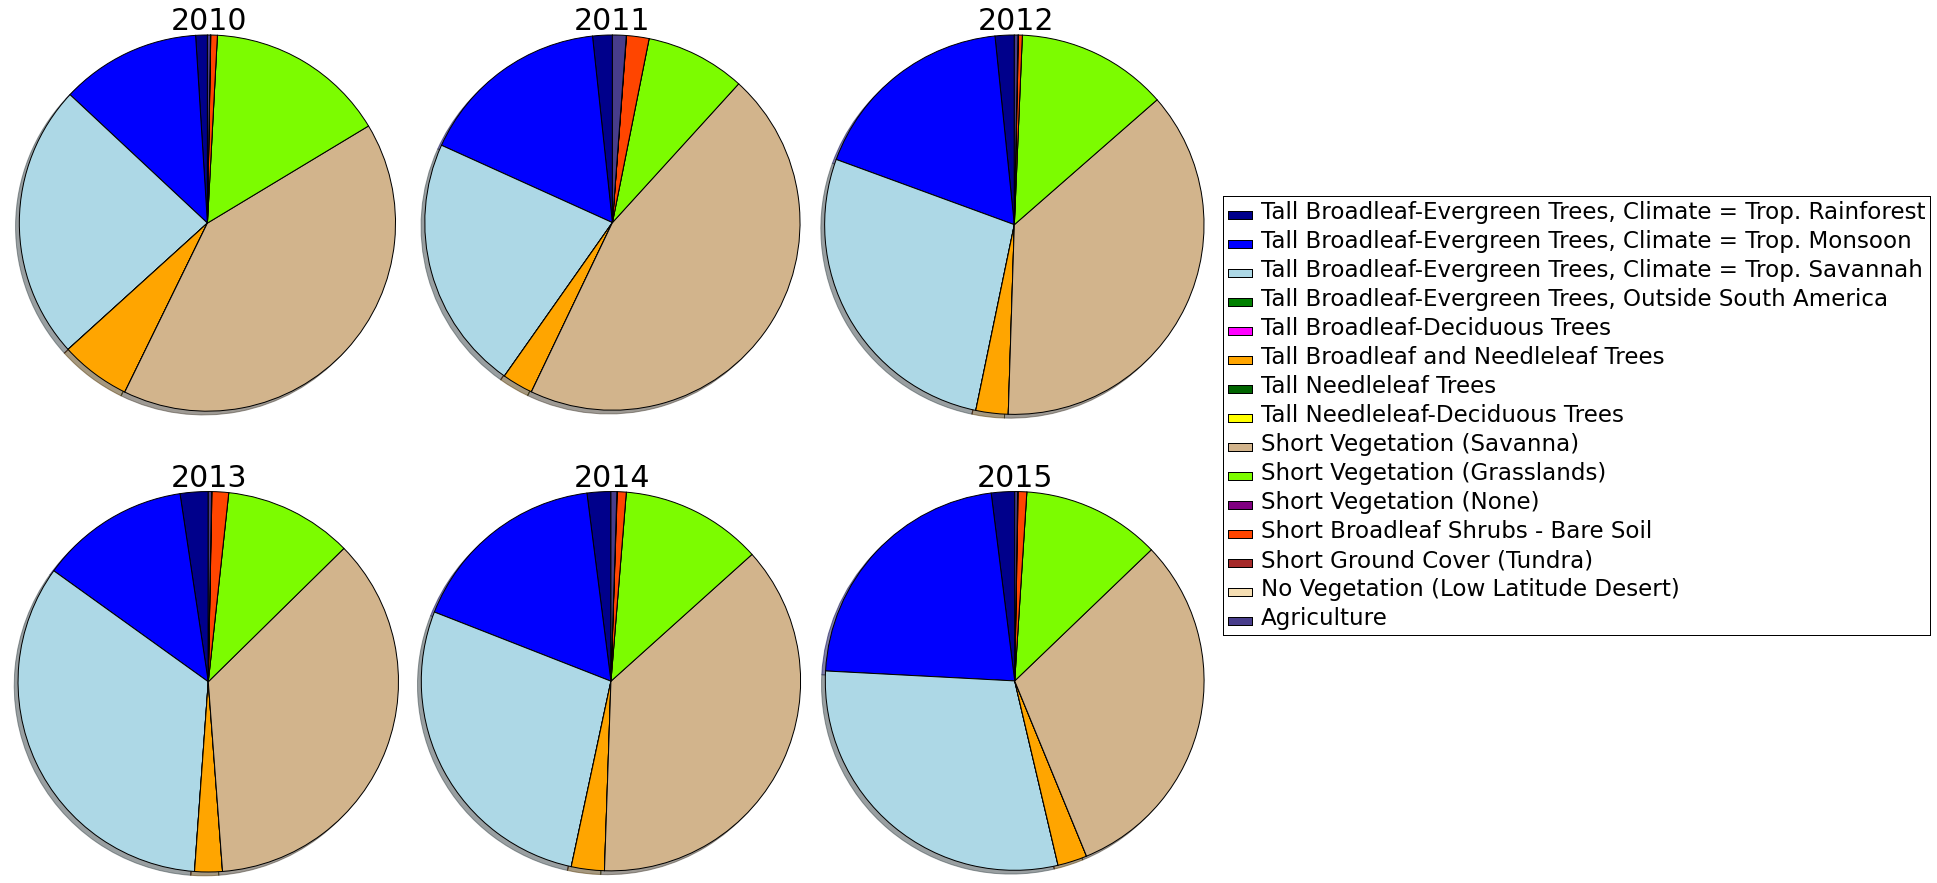

In [19]:
########################################### Yearly plots for each fire product ###############################################

fig = plt.figure(1,figsize=(28,15))
fig.subplots_adjust(left=0,right=0.6,wspace=0)
ax1 = plt.subplot(231)
ax1.set_title('2010',fontsize=30)
ax2 = plt.subplot(232)
ax2.set_title('2011',fontsize=30)
ax3 = plt.subplot(233)
ax3.set_title('2012',fontsize=30)
ax4 = plt.subplot(234)
ax4.set_title('2013',fontsize=30)
ax5 = plt.subplot(235)
ax5.set_title('2014',fontsize=30)
ax6 = plt.subplot(236)
ax6.set_title('2015',fontsize=30)

############# Remember to change the name for 
############# the fireproduct that wants to be plotted

# SiBCASA_GFED4, GFAS, FINN, CASA_GFED4 

fire_prod = CASA_GFED4
for i in range(6):
    year_perc = fire_prod.iloc[:,[i]]
    if i == 0:
        ax1.pie(year_perc,colors=clrs_sib_koppen,startangle=90,shadow=True)
    if i == 1:
        ax2.pie(year_perc,colors=clrs_sib_koppen,startangle=90,shadow=True)
    if i == 2:
        ax3.pie(year_perc,colors=clrs_sib_koppen,startangle=90,shadow=True)
    if i == 3:
        ax4.pie(year_perc,colors=clrs_sib_koppen,startangle=90,shadow=True)
    if i == 4:
        ax5.pie(year_perc,colors=clrs_sib_koppen,startangle=90,shadow=True)
    if i == 5:
        ax6.pie(year_perc,colors=clrs_sib_koppen,startangle=90,shadow=True)
    
ax1.axis('equal') 
ax2.axis('equal') 
ax3.axis('equal')
ax4.axis('equal')
ax4.axis('equal')
ax5.axis('equal')
ax6.axis('equal')

ax6.legend(biomes_sib_koppen[1:],loc='center left', bbox_to_anchor=(1, 1.2))
leg = plt.gca().get_legend()
ltext  = leg.get_texts()
plt.setp(ltext, fontsize='23') 
fig.savefig('CASA_GFED4_separate_years.png')
plt.show()

In [20]:
######################################### New data frames for each selected biome (%) #########################################

all_biomes = [trop_forest, trop_monsoon, trop_savannah, savannah, grasslands]

#times = np.arange(dt.datetime(2010,7,1,0,0,0), dt.datetime(2015,7,1,0,0,0),dt.timedelta(days=365))
times = pd.Series([2010,2011,2012,2013,2014,2015])


for i in range(len(all_biomes)):
    dataframe = pd.DataFrame(SiBCASA_GFED4_grasslands,index=times, columns = ('SiBCASA_GFED4','GFAS','FINN','CASA_GFED4'))
    biomes = all_biomes[i]
    iterator = i
    #print biomes
    for j in range(len(biomes)):
        #print j
        val = (biomes[j]).values
        val2 = val.T
        #print val2
        col = ['SiBCASA_GFED4','GFAS','FINN','CASA_GFED4']
        #print col[j]
        dataframe.loc[:,col[j]] = val2
        
        if iterator == 0:
            trop_forest_df = dataframe
            #trop_forest_df.to_pickle('trop_forest')
        if iterator == 1:
            trop_monsoon_df = dataframe
            #trop_forest_df.to_pickle('trop_forest')
        if iterator == 2:
            trop_savannah_df = dataframe
        if iterator ==  3:
            savannah_df = dataframe
        if iterator == 4:
            grasslands_df = dataframe
    
trop_forest_df = trop_forest_df.astype(float)
trop_monsoon_df = trop_monsoon_df.astype(float)
trop_savannah_df = trop_savannah_df.astype(float)
savannah_df = savannah_df.astype(float)
grasslands_df = grasslands_df.astype(float)

# trop_forest_df
# trop_monsoon_df
# trop_savannah_df
# savannah_df
# grasslands_df



In [21]:
################################## New data frames for each selected biome (emissions) #########################################

all_biomes2 = [trop_forest_em, trop_monsoon_em, trop_savannah_em, savannah_em, grasslands_em]
times = pd.Series([2010,2011,2012,2013,2014,2015])

for i in range(len(all_biomes2)):
    dataframe2 = pd.DataFrame(SiBCASA_GFED4_grasslands_em,index=times, columns = ('SiBCASA_GFED4','GFAS','FINN','CASA_GFED4'))
    biomes2 = all_biomes2[i]
    iterator = i
    for j in range(len(biomes2)):
        val = (biomes2[j]).values
        val2 = val.T
        col = ['SiBCASA_GFED4','GFAS','FINN','CASA_GFED4']
        dataframe2.loc[:,col[j]] = val2
        
        if iterator == 0:
            trop_forest_df_em = dataframe2
            #trop_forest_df.to_pickle('trop_forest')
        if iterator == 1:
            trop_monsoon_df_em = dataframe2
            #trop_forest_df.to_pickle('trop_forest')
        if iterator == 2:
            trop_savannah_df_em = dataframe2
        if iterator ==  3:
            savannah_df_em = dataframe2
        if iterator == 4:
            grasslands_df_em = dataframe2
    
trop_forest_df_em = trop_forest_df_em.astype(float)
trop_monsoon_df_em = trop_monsoon_df_em.astype(float)
trop_savannah_df_em = trop_savannah_df_em.astype(float)
savannah_df_em = savannah_df_em.astype(float)
grasslands_df_em = grasslands_df_em.astype(float)


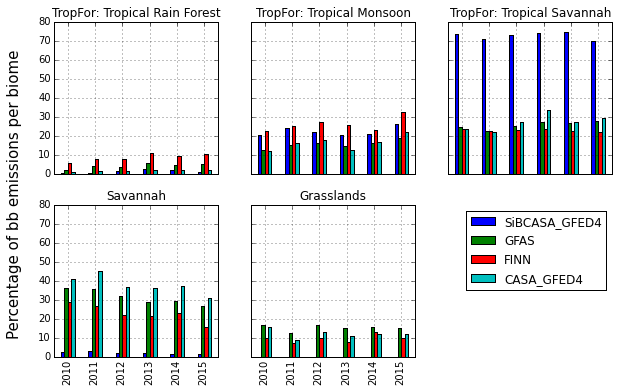

In [28]:
############################################# Plotting of selected biomes ###########################################
#legend = ['SiBCASA_GFED4','GFAS', 'FINN', 'CASA_GFED4']
fig, axes = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(10,6))
fig.text(0.06, 0.5, 'Percentage of bb emissions per biome', va='center', rotation='vertical',fontsize=15)

tofill = trop_forest_df.copy()
tofill.at[:,'SiBCASA_GFED4'] = 0
tofill.at[:,'GFAS'] = 0
tofill.at[:,'FINN'] = 0
tofill.at[:,'CASA_GFED4'] = 0

ax1 = trop_forest_df.plot(kind='bar',title='TropFor: Tropical Rain Forest',ax=axes[0,0], legend=False)
ax2 = trop_monsoon_df.plot(kind='bar',title='TropFor: Tropical Monsoon', ax=axes[0,1], legend=False)
ax3 = trop_savannah_df.plot(kind='bar', title='TropFor: Tropical Savannah',ax=axes[0,2], legend=False)
ax4 = savannah_df.plot(kind='bar', title='Savannah', ax=axes[1,0], legend=False)
ax5 = grasslands_df.plot(kind='bar', title='Grasslands', ax=axes[1,1], legend=False)

ax6 = tofill.plot(kind='bar',ax=axes[1,2], legend=True, grid=False)
ax6.tick_params(axis='x', which='both',bottom='off',top='off',labelbottom='off')
ax6.tick_params(axis='y', which='both',left='off',right='off')
ax6.spines['right'].set_color('none')
ax6.spines['left'].set_color('none')
ax6.spines['bottom'].set_color('none')
ax6.spines['top'].set_color('none')

ax1.set_ylim([0,80])
ax2.set_ylim([0,80])
ax3.set_ylim([0,80])
ax4.set_ylim([0,80])
ax5.set_ylim([0,80])
ax6.set_ylim([0,80])

#ax6.legend(legend[:],loc='center left', bbox_to_anchor=(1, 1.2))

#leg = plt.gca().get_legend()
#ltext  = leg.get_texts()
#plt.setp(ltext, fontsize='23') 
#plt.tight_layout()
fig.savefig('Percentage of fire emissions for Selected Biomes and each fproduct.png')#, bbox_extra_artists=(leg,), bbox_inches='tight')
#plt.show() 


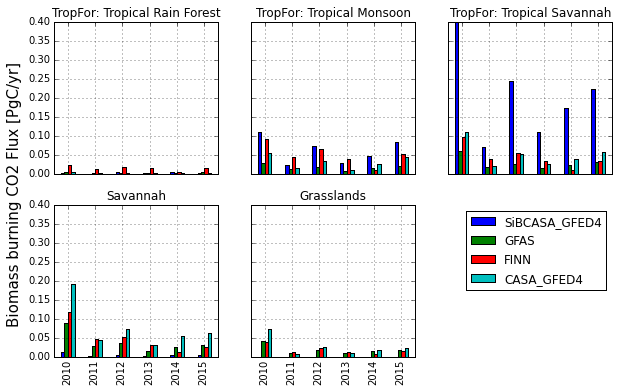

In [27]:
############################################# Plotting of selected biomes ###########################################
#legend = ['SiBCASA_GFED4','GFAS', 'FINN', 'CASA_GFED4']
fig, axes = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(10,6))
fig.text(0.06, 0.5, 'Biomass burning CO2 Flux [PgC/yr]', va='center', rotation='vertical',fontsize=15)

tofill = trop_forest_df_em.copy()
tofill.at[:,'SiBCASA_GFED4'] = 0
tofill.at[:,'GFAS'] = 0
tofill.at[:,'FINN'] = 0
tofill.at[:,'CASA_GFED4'] = 0

ax1 = trop_forest_df_em.plot(kind='bar',title='TropFor: Tropical Rain Forest',ax=axes[0,0], legend=False)
ax2 = trop_monsoon_df_em.plot(kind='bar',title='TropFor: Tropical Monsoon', ax=axes[0,1], legend=False)
ax3 = trop_savannah_df_em.plot(kind='bar', title='TropFor: Tropical Savannah',ax=axes[0,2], legend=False)
ax4 = savannah_df_em.plot(kind='bar', title='Savannah', ax=axes[1,0], legend=False)
ax5 = grasslands_df_em.plot(kind='bar', title='Grasslands', ax=axes[1,1], legend=False)

ax6 = tofill.plot(kind='bar',ax=axes[1,2], legend=True, grid=False)
ax6.tick_params(axis='x', which='both',bottom='off',top='off',labelbottom='off')
ax6.tick_params(axis='y', which='both',left='off',right='off')
ax6.spines['right'].set_color('none')
ax6.spines['left'].set_color('none')
ax6.spines['bottom'].set_color('none')
ax6.spines['top'].set_color('none')

ax1.set_ylim([0,0.4])
ax2.set_ylim([0,0.4])
ax3.set_ylim([0,0.4])
ax4.set_ylim([0,0.4])
ax5.set_ylim([0,0.4])
ax6.set_ylim([0,0.4])

#ax6.legend(legend[:],loc='center left', bbox_to_anchor=(1, 1.2))

#leg = plt.gca().get_legend()
#ltext  = leg.get_texts()
#plt.setp(ltext, fontsize='23') 
#plt.tight_layout()
fig.savefig('BB emissions for Selected Biomes and each fproduct.png') #, bbox_extra_artists=(leg,), bbox_inches='tight')
#plt.show() 


In [26]:
grasslands_df
#enumerate(): Return an enumerate object. sequence must be a sequence, an iterator, 
#or some other object which supports iteration. The next() method of the 
#iterator returned by enumerate() returns a tuple containing a count (from 
#start which defaults to 0) and the values obtained from iterating over 
#sequence:

#listdir: Return a list containing the names of the entries in the directory given 
#by path. The list is in arbitrary order. It does not include the special 
#entries '.' and '..' even if they are present in the directory.

# class - datetime.datetime(year, month, day[, hour[, minute[, second[, 
# microsecond[, tzinfo]]]]])

,SiBCASA_GFED4,GFAS,FINN,CASA_GFED4
2010,0.036,16.917,9.783,15.519
2011,0.047,12.438,7.477,8.613
2012,0.033,16.719,9.994,12.888
2013,0.028,15.297,7.898,10.915
2014,0.035,15.437,13.239,12.055
2015,0.029,15.007,10.137,11.802
